## Apriori Algorithm Implementation in R using 'arules' library

Association mining is usually done on transactions data from a retail market or from an online e-commerce store. Since most transactions data is large, the apriori algorithm makes it easier to find these patterns or rules quickly. Association Rules are widely used to analyze retail basket or transaction data, and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

Apriori uses a "bottom up" approach, where frequent subsets are extended one item at a time (a step known as candidate generation), and groups of candidates are tested against the data. The algorithm terminates when no further successful extensions are found.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/549fa6a5f46897d137b5d704ef7f30b6ba36d4de)

## Import Required libraries

In [1]:
if(sessionzInfo()['basePkgs']=="dplyr" | sessionInfo()['otherPkgs']=="dplyr"){
  detach(package:dplyr, unload=TRUE)
}

if(sessionInfo()['basePkgs']=="tm" | sessionInfo()['otherPkgs']=="tm"){
  detach(package:sentiment, unload=TRUE)
  detach(package:tm, unload=TRUE)
}

library(plyr)
library(arules)
library(arulesViz)

SyntaxError: invalid syntax (2682355838.py, line 1)

## Import the dataset

In [2]:
groceries <- read.csv("../input/groceries-dataset/Groceries_dataset.csv")
class(groceries)

[1] "data.frame"

## Data Cleaning and Exploration

In [3]:
str(groceries)

'data.frame':	38765 obs. of  3 variables:
 $ Member_number  : int  1808 2552 2300 1187 3037 4941 4501 3803 2762 4119 ...
 $ Date           : Factor w/ 728 levels "01-01-2014","01-01-2015",..: 494 98 450 288 4 316 178 552 462 268 ...
 $ itemDescription: Factor w/ 167 levels "abrasive cleaner",..: 156 165 109 102 165 122 102 112 165 156 ...


In [4]:
head(groceries)

,Member_number,Date,itemDescription
,<int>,<fct>,<fct>
1,1808,21-07-2015,tropical fruit
2,2552,05-01-2015,whole milk
3,2300,19-09-2015,pip fruit
4,1187,12-12-2015,other vegetables
5,3037,01-02-2015,whole milk
6,4941,14-02-2015,rolls/buns


### Checking NA values

In [5]:
sum(is.na(groceries))

[1] 0

### Convert member number to numeric

In [6]:
sorted <- groceries[order(groceries$Member_number),]

### Convert item description to categorical format

In [7]:
sorted$Member_number <- as.numeric(sorted$Member_number)
str(sorted)

'data.frame':	38765 obs. of  3 variables:
 $ Member_number  : num  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ Date           : Factor w/ 728 levels "01-01-2014","01-01-2015",..: 634 566 342 598 342 563 634 566 342 598 ...
 $ itemDescription: Factor w/ 167 levels "abrasive cleaner",..: 138 19 130 130 165 165 108 92 132 72 ...


### Group all the items that were bought together by the same customer on the same date

In [8]:
itemList <- ddply(sorted, c("Member_number","Date"), function(df1)paste(df1$itemDescription,collapse = ","))
                  
head(itemList,15)

,Member_number,Date,V1
,<dbl>,<fct>,<chr>
1,1000,15-03-2015,"sausage,whole milk,semi-finished bread,yogurt"
2,1000,24-06-2014,"whole milk,pastry,salty snack"
3,1000,24-07-2015,"canned beer,misc. beverages"
4,1000,25-11-2015,"sausage,hygiene articles"
5,1000,27-05-2015,"soda,pickled vegetables"
6,1001,02-05-2015,"frankfurter,curd"
7,1001,07-02-2014,"sausage,whole milk,rolls/buns"
8,1001,12-12-2014,"whole milk,soda"
9,1001,14-04-2015,"beef,white bread"


### Remove member number and date

In [9]:
itemList$Member_number <- NULL
itemList$Date <- NULL
colnames(itemList) <- c("itemList")

In [10]:
write.csv(itemList,"ItemList.csv", quote = FALSE, row.names = TRUE)
head(itemList)

,itemList
,<chr>
1,"sausage,whole milk,semi-finished bread,yogurt"
2,"whole milk,pastry,salty snack"
3,"canned beer,misc. beverages"
4,"sausage,hygiene articles"
5,"soda,pickled vegetables"
6,"frankfurter,curd"


## Convert CSV file to Basket Format

In [11]:
txn = read.transactions(file="ItemList.csv", rm.duplicates= TRUE, format="basket",sep=",",cols=1);
print(txn)

distribution of transactions with duplicates:
items
  1   2   3   4 
662  39   5   1 
transactions in sparse format with
 14964 transactions (rows) and
 168 items (columns)


There are in total 14,964 transactions with 168 distinct products.

### Remove quotes from Transaction

In [12]:
txn@itemInfo$labels <- gsub("\"","",txn@itemInfo$labels)

## Apriori Algorithm

The apriori() generates the most relevent set of rules from a given transaction data. It also shows the support, confidence and lift of those rules. These three measure can be used to decide the relative strength of the rules. So what do these terms mean?

Lets consider the rule X => Y in order to compute these metrics.

![](https://s3.ap-south-1.amazonaws.com/techleer/243.jpg)

In [13]:
basket_rules <- apriori(txn, parameter = list(minlen=2, sup = 0.001, conf = 0.05, target="rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.05    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[168 item(s), 14964 transaction(s)] done [0.00s].
sorting and recoding items ... [149 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [450 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


### Total rules generated

In [14]:
print(length(basket_rules))

[1] 450


In [15]:
summary(basket_rules)

set of 450 rules

rule length distribution (lhs + rhs):sizes
  2   3 
423  27 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    2.00    2.06    2.00    3.00 

summary of quality measures:
    support           confidence         coverage             lift       
 Min.   :0.001002   Min.   :0.05000   Min.   :0.005346   Min.   :0.5195  
 1st Qu.:0.001270   1st Qu.:0.06397   1st Qu.:0.015972   1st Qu.:0.7673  
 Median :0.001938   Median :0.08108   Median :0.023590   Median :0.8350  
 Mean   :0.002760   Mean   :0.08759   Mean   :0.033723   Mean   :0.8859  
 3rd Qu.:0.003341   3rd Qu.:0.10482   3rd Qu.:0.043705   3rd Qu.:0.9601  
 Max.   :0.014836   Max.   :0.25581   Max.   :0.157912   Max.   :2.1831  
     count      
 Min.   : 15.0  
 1st Qu.: 19.0  
 Median : 29.0  
 Mean   : 41.3  
 3rd Qu.: 50.0  
 Max.   :222.0  

mining info:
 data ntransactions support confidence
  txn         14964   0.001       0.05

### Inspecting the basket rules

In [16]:
inspect(basket_rules[1:20])

     lhs                            rhs                support     confidence
[1]  {frozen fish}               => {whole milk}       0.001069233 0.1568627 
[2]  {seasonal products}         => {rolls/buns}       0.001002406 0.1415094 
[3]  {pot plants}                => {other vegetables} 0.001002406 0.1282051 
[4]  {pot plants}                => {whole milk}       0.001002406 0.1282051 
[5]  {pasta}                     => {whole milk}       0.001069233 0.1322314 
[6]  {pickled vegetables}        => {whole milk}       0.001002406 0.1119403 
[7]  {packaged fruit/vegetables} => {rolls/buns}       0.001202887 0.1417323 
[8]  {detergent}                 => {yogurt}           0.001069233 0.1240310 
[9]  {detergent}                 => {rolls/buns}       0.001002406 0.1162791 
[10] {detergent}                 => {whole milk}       0.001403368 0.1627907 
[11] {semi-finished bread}       => {other vegetables} 0.001002406 0.1056338 
[12] {semi-finished bread}       => {whole milk}       0.0016706

## Visualizing the Association Rules

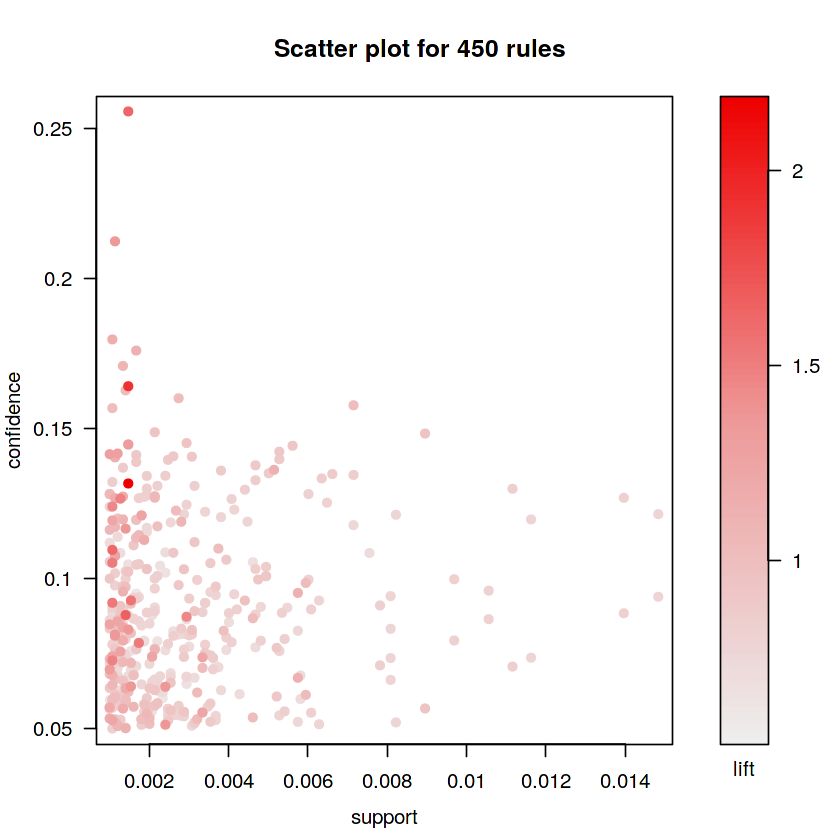

In [17]:
plot(basket_rules, jitter = 0)

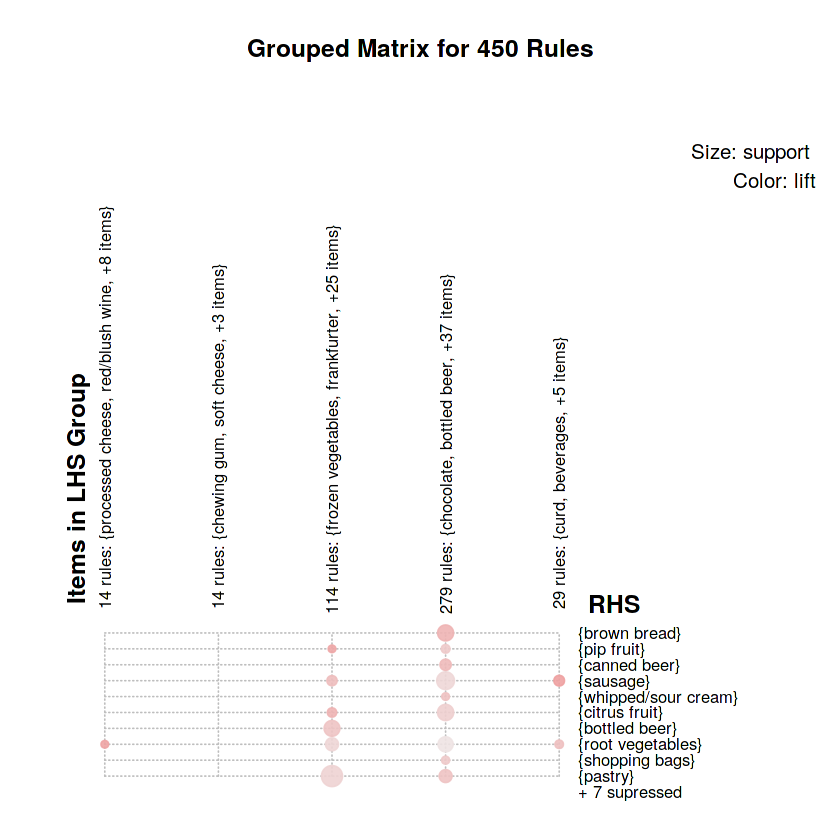

In [18]:
plot(basket_rules, method = "grouped", control = list(k = 5))

### Graph of first 20 rules

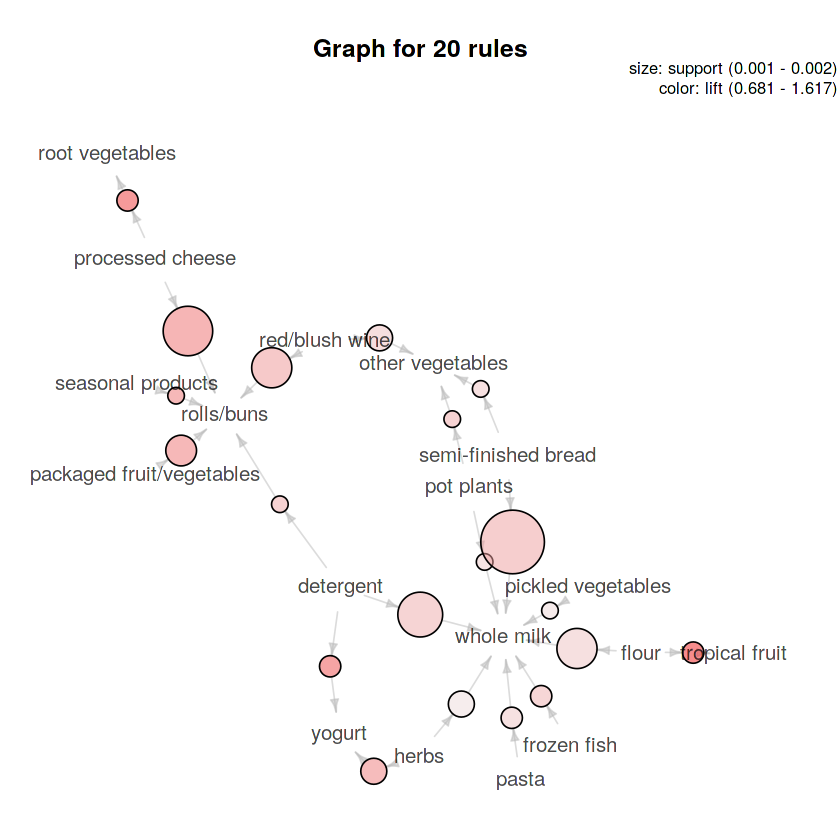

In [19]:
plot(basket_rules[1:20], method="graph")

### Graph of first 50 rules

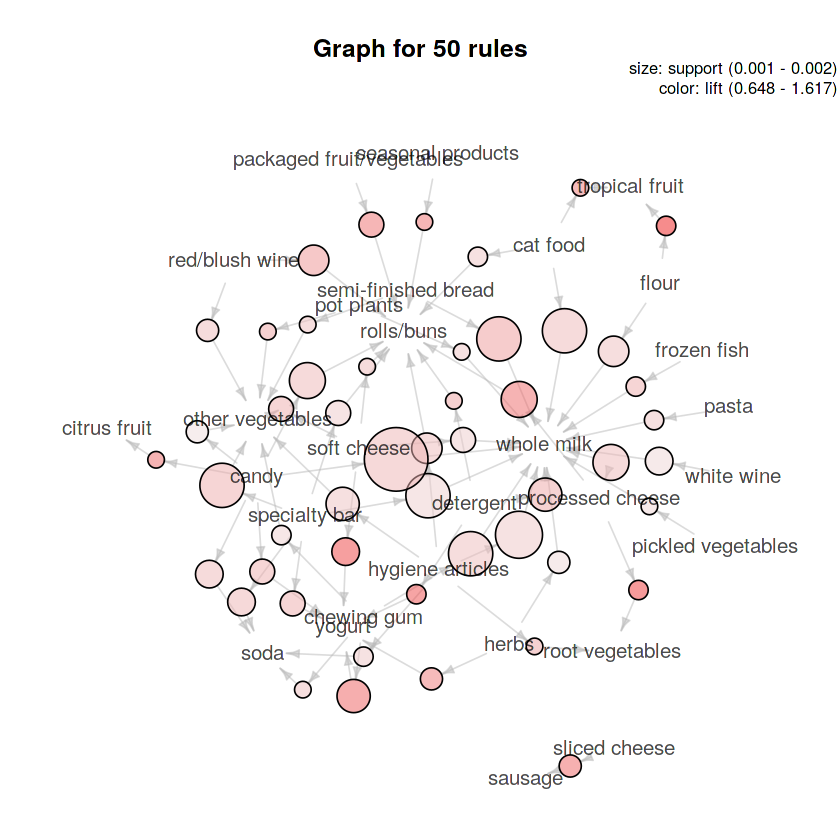

In [20]:
plot(basket_rules[1:50], method="graph")

### Parallel coordinates plot

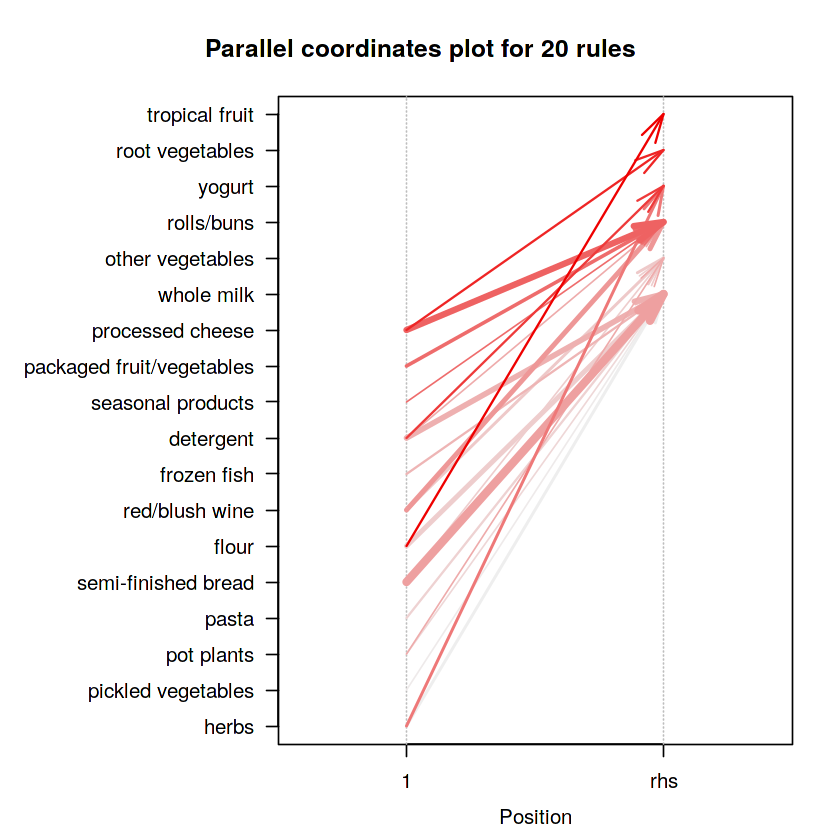

In [21]:
plot(basket_rules[1:20], method="paracoord")

## Most Frequent Products

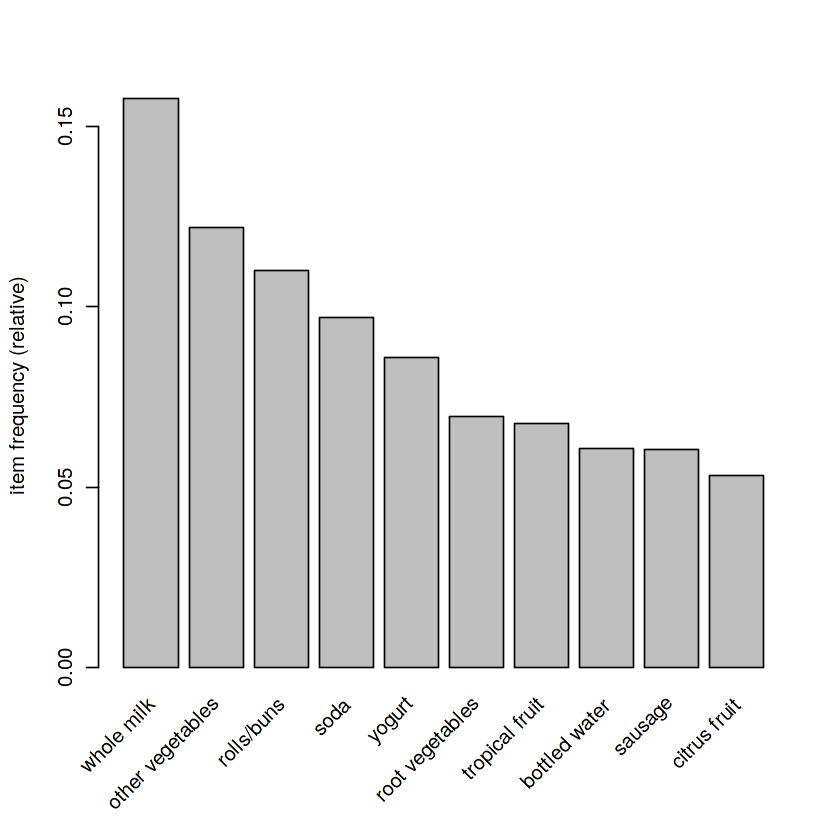

In [22]:
itemFrequencyPlot(txn, topN = 10)

## Changing hyperparameters

In [23]:
basket_rules2 <- apriori(txn, parameter = list(minlen=3, sup = 0.001, conf = 0.1, target="rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   0.001      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[168 item(s), 14964 transaction(s)] done [0.00s].
sorting and recoding items ... [149 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [24]:
print(length(basket_rules2))

[1] 17


In [25]:
summary(basket_rules2)

set of 17 rules

rule length distribution (lhs + rhs):sizes
 3 
17 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      3       3       3       3       3       3 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001002   Min.   :0.1018   Min.   :0.005346   Min.   :0.7214  
 1st Qu.:0.001136   1st Qu.:0.1172   1st Qu.:0.008086   1st Qu.:0.8897  
 Median :0.001136   Median :0.1269   Median :0.008955   Median :1.1081  
 Mean   :0.001207   Mean   :0.1437   Mean   :0.008821   Mean   :1.1794  
 3rd Qu.:0.001337   3rd Qu.:0.1642   3rd Qu.:0.010559   3rd Qu.:1.2297  
 Max.   :0.001470   Max.   :0.2558   Max.   :0.011160   Max.   :2.1831  
     count      
 Min.   :15.00  
 1st Qu.:17.00  
 Median :17.00  
 Mean   :18.06  
 3rd Qu.:20.00  
 Max.   :22.00  

mining info:
 data ntransactions support confidence
  txn         14964   0.001        0.1

In [26]:
inspect(basket_rules2)

     lhs                              rhs                support     confidence
[1]  {sausage,yogurt}              => {whole milk}       0.001470195 0.2558140 
[2]  {sausage,whole milk}          => {yogurt}           0.001470195 0.1641791 
[3]  {whole milk,yogurt}           => {sausage}          0.001470195 0.1317365 
[4]  {sausage,soda}                => {whole milk}       0.001069233 0.1797753 
[5]  {sausage,whole milk}          => {soda}             0.001069233 0.1194030 
[6]  {rolls/buns,sausage}          => {whole milk}       0.001136060 0.2125000 
[7]  {sausage,whole milk}          => {rolls/buns}       0.001136060 0.1268657 
[8]  {rolls/buns,yogurt}           => {whole milk}       0.001336541 0.1709402 
[9]  {whole milk,yogurt}           => {rolls/buns}       0.001336541 0.1197605 
[10] {other vegetables,yogurt}     => {whole milk}       0.001136060 0.1404959 
[11] {whole milk,yogurt}           => {other vegetables} 0.001136060 0.1017964 
[12] {rolls/buns,soda}             => {o

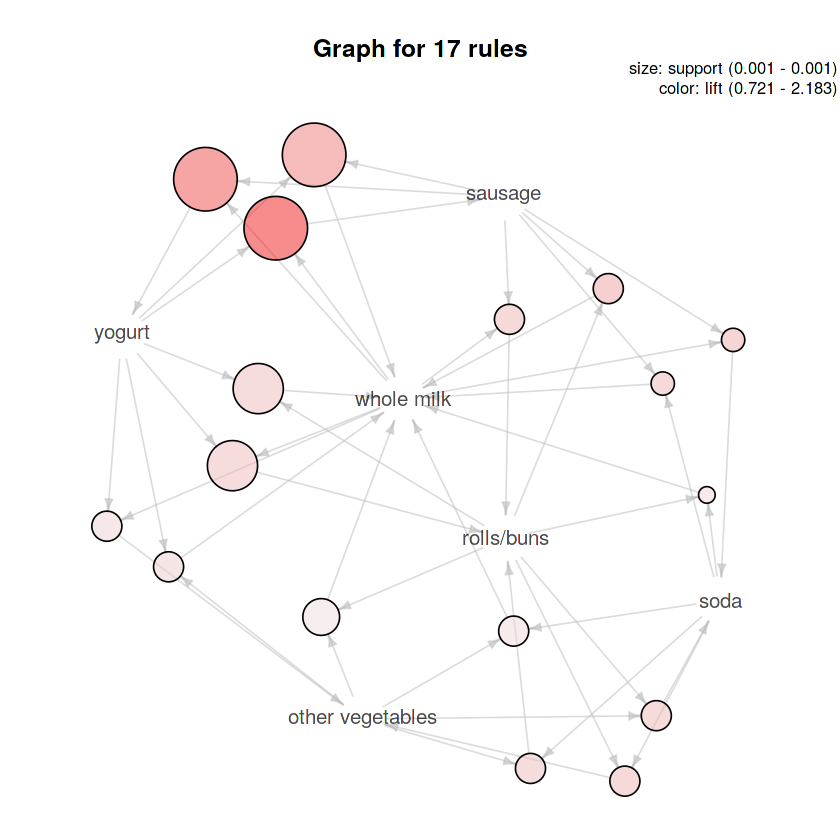

In [27]:
plot(basket_rules2, method="graph")

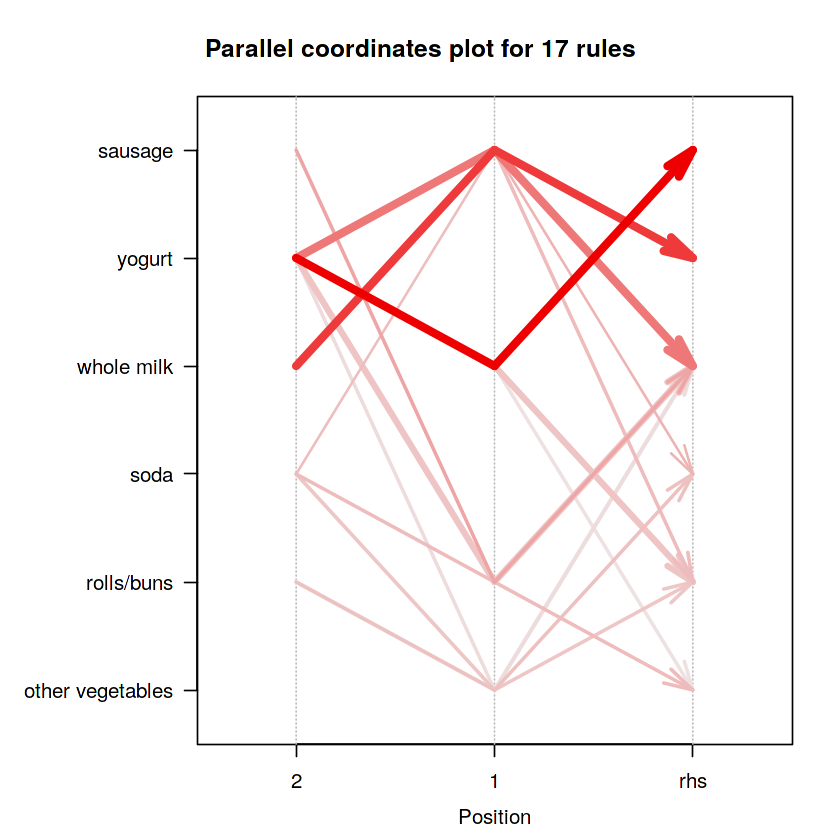

In [28]:
plot(basket_rules2, method="paracoord")